# Step 2 — Dataset Collection and understanding

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations-in-E-Commerce\data\online_retail.csv")

In [3]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
114387,546008,85204,HANGING WOOD AND FELT FLOWER,1,2023-03-08 15:43:00,0.42,NaN,United Kingdom
42514,540002,21911,GARDEN METAL SIGN,12,2023-01-04 10:23:00,1.65,16656.0,United Kingdom
274286,560895,23226,FILIGREE HEART DAISY WHITE,24,2023-07-21 17:12:00,1.25,13089.0,United Kingdom
241429,558203,23024,LARGE BONNE JAM JAR T-LIGHT HOLDER,72,2023-06-27 13:51:00,2.49,17386.0,United Kingdom
157293,550199,23206,LUNCH BAG APPLE DESIGN,10,2023-04-15 10:20:00,1.65,16523.0,United Kingdom


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.shape

(541909, 8)

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Step 2 — Data Preprocessing

In [9]:
# Check how many missing
print(df['CustomerID'].isnull().sum())

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])


135080


In [10]:
# Cancelled invoices usually start with 'C'
df = df[~df['InvoiceNo'].str.startswith('C')]


In [11]:
# Keep only positive quantities
df = df[df['Quantity'] > 0]

# Keep only positive prices
df = df[df['UnitPrice'] > 0]


In [12]:
df = df.reset_index(drop=True)


In [13]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED 

# Step 3 — Exploratory Data Analysis (EDA)

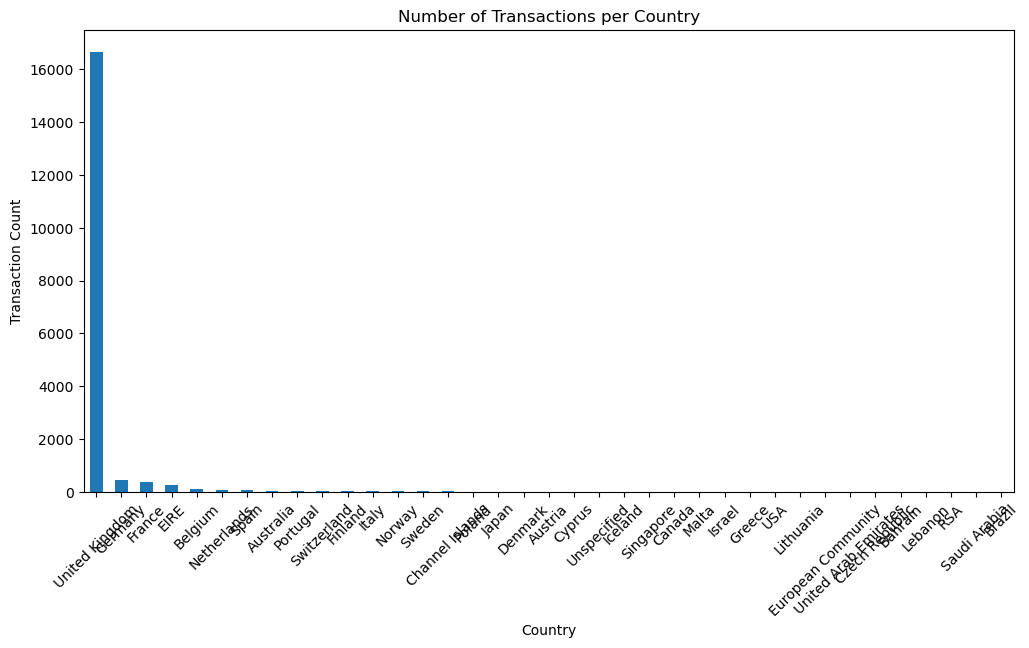

In [14]:
# Analyze Transaction Volume by Country
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
country_sales.plot(kind='bar')
plt.title('Number of Transactions per Country')
plt.ylabel('Transaction Count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


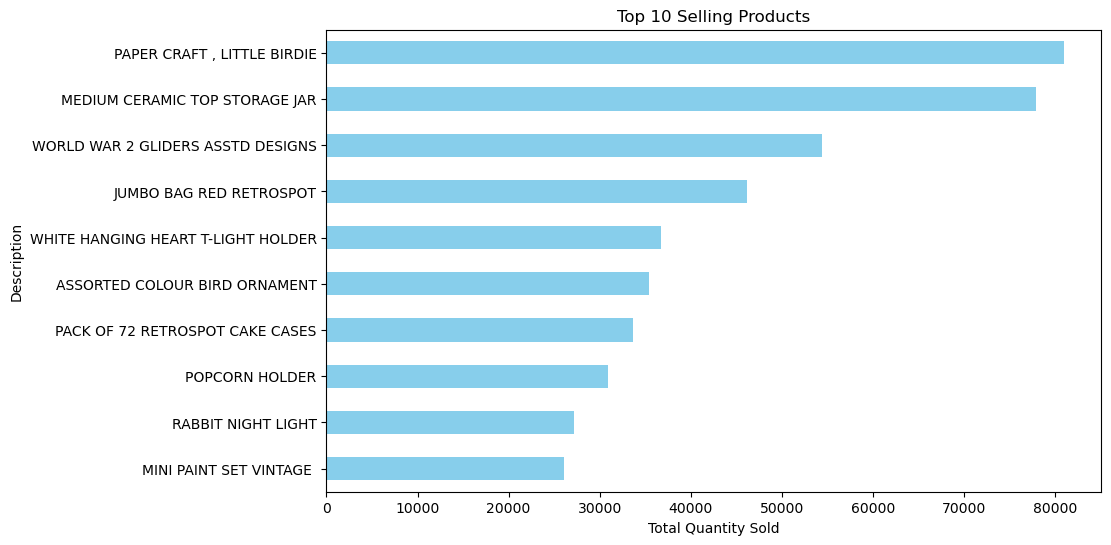

In [15]:
#  Identify Top-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.show()


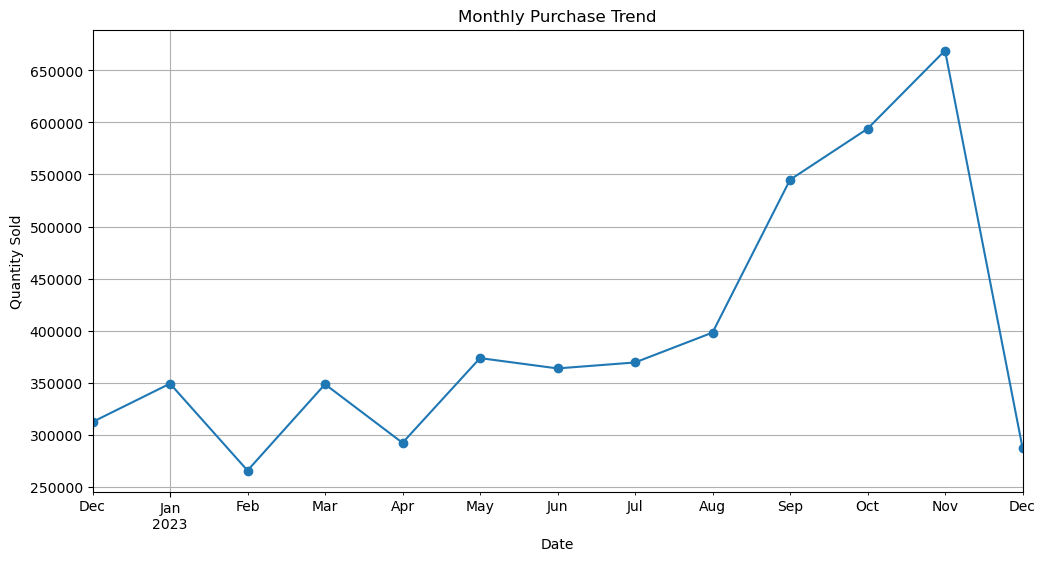

In [16]:
# Visualize Purchase Trends Over Time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.set_index('InvoiceDate', inplace=True)
monthly_sales = df.resample('M')['Quantity'].sum()

monthly_sales.plot(figsize=(12,6), marker='o')
plt.title('Monthly Purchase Trend')
plt.ylabel('Quantity Sold')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# Reset index for future processing
df.reset_index(inplace=True)


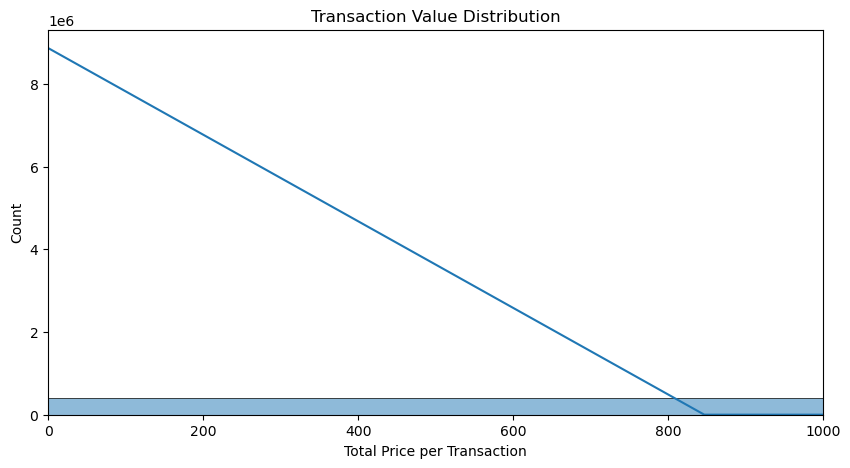

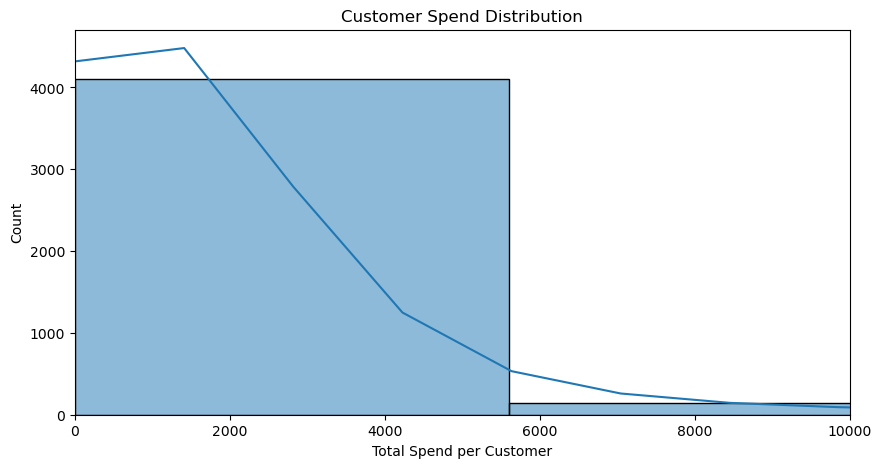

In [17]:
# Inspect Monetary Distribution per Transaction and Customer
# Add Total Price column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Distribution per transaction
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['TotalPrice'], bins=100, kde=True)
plt.xlim(0, 1000)  # limit to remove extreme outliers
plt.title('Transaction Value Distribution')
plt.xlabel('Total Price per Transaction')
plt.show()

# Total spending per customer
customer_spend = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.histplot(customer_spend, bins=50, kde=True)
plt.xlim(0, 10000)
plt.title('Customer Spend Distribution')
plt.xlabel('Total Spend per Customer')
plt.show()


In [19]:
#  RFM Distributions (after Step 4 RFM calc — preview only for now)
# Define Reference Date
import pandas as pd

# Create TotalPrice if not already done
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Set reference date
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference Date:", reference_date)


Reference Date: 2023-12-10 12:50:00


In [20]:
# Group by Customer and Calculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


<Axes: xlabel='Recency', ylabel='Count'>

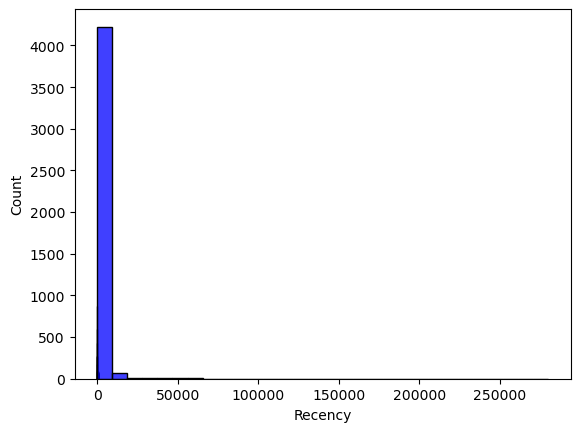

In [21]:
# After RFM step
sns.histplot(rfm['Recency'], bins=30, color='red')
sns.histplot(rfm['Frequency'], bins=30, color='green')
sns.histplot(rfm['Monetary'], bins=30, color='blue')


c:\Anacondaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Anacondaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

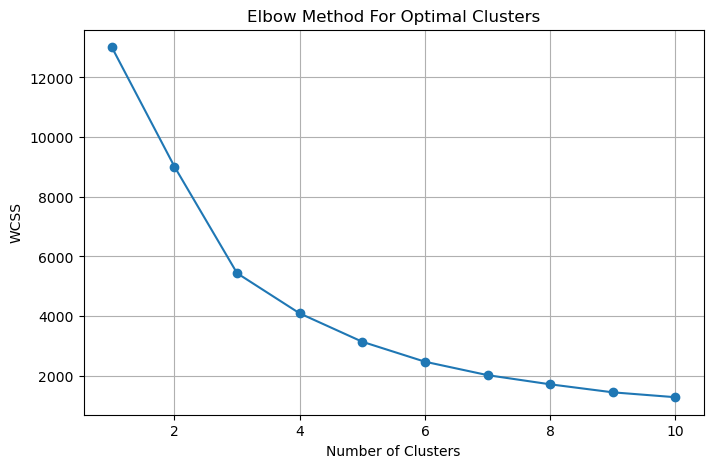

In [22]:
#  Elbow Curve for Cluster Selection
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale RFM data (after Step 4)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Elbow curve
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [23]:
# Customer Cluster Profiles (after clustering)
rfm['Cluster'] = kmeans.predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster').mean()
print(cluster_summary)


           CustomerID     Recency   Frequency       Monetary
Cluster                                                     
0        15371.656250   11.000000   26.312500   12874.864062
1        15329.471429   23.280124    3.068944    1064.923920
2        15264.240079  307.761905    1.279762     400.727996
3        16661.000000    3.000000   45.250000  225721.652500
4        13829.500000    1.000000  205.000000   88772.395000
5        14930.461538   34.153846   34.000000   73826.107692
6        15193.583420   84.219689    2.211399     854.291536
7        14432.000000    2.000000   87.142857   35600.392857
8        15295.969925   19.451128   10.355263    4142.619436
9        15430.046281  191.209917    1.874380     729.401836


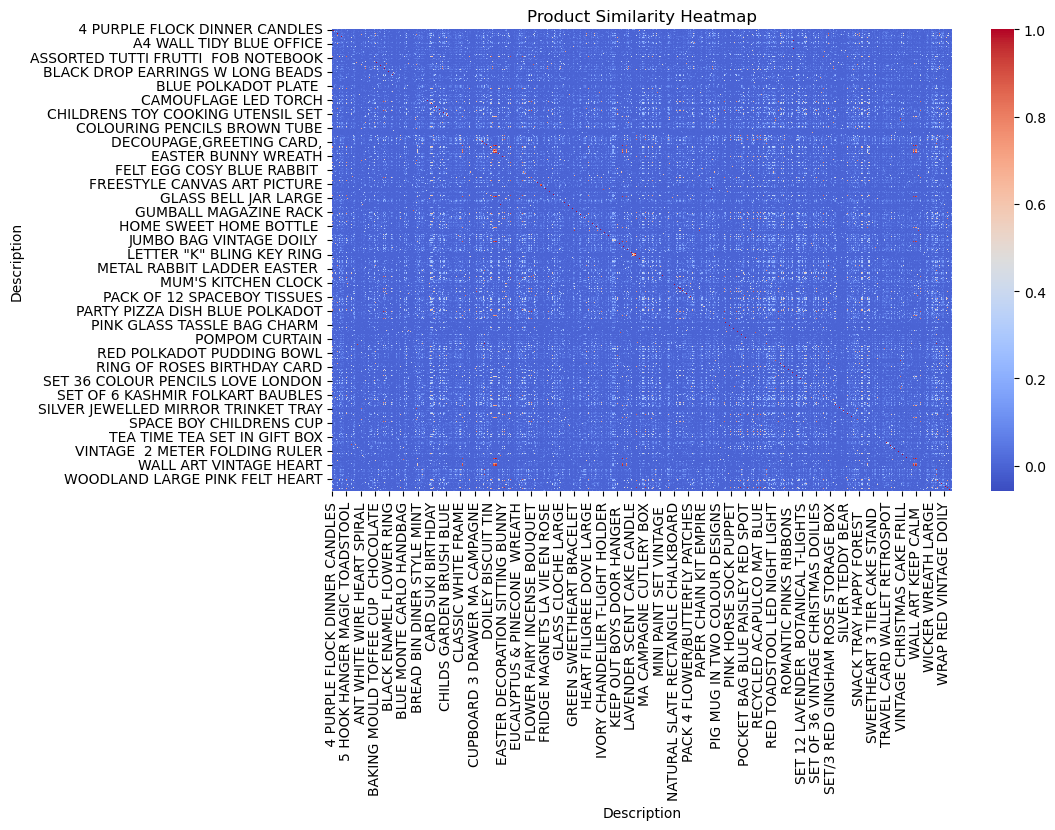

In [24]:
# Product Recommendation Heatmap / Similarity Matrix
# This comes in the next stage, but a teaser

pivot = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(pivot.corr(), cmap='coolwarm')
plt.title("Product Similarity Heatmap")
plt.show()


# Step 4 — Feature Engineering for RFM (Recency, Frequency, Monetary)

In [25]:
# Set Reference Date
# We need this to calculate Recency.



# Step 1: Make sure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 2: Create TotalPrice column (if not already done)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 3: Set reference date as 1 day after the last purchase in dataset
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference Date:", reference_date)


Reference Date: 2023-12-10 12:50:00


In [26]:
# Calculate RFM Features

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [27]:
# Check RFM Output

print(rfm.head())
rfm.describe()


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


In [28]:
# Normalize for Clustering



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


Apply KMeans Clustering

In [29]:
from sklearn.cluster import KMeans

# Choose 4 clusters (based on business understanding or Elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


c:\Anacondaa\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 Interpret & Label the Clusters

In [30]:
rfm_cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(rfm_cluster_summary)


            Recency  Frequency       Monetary
Cluster                                      
0        248.564030   1.551789     478.107581
1         15.672986  22.047393   12453.225924
2          7.384615  82.538462  127338.313846
3         43.920380   3.656291    1350.140532


Now manually assign labels by interpreting the values:

In [31]:
# Create a dictionary for custom labels based on the cluster means
# You'll need to manually match the cluster numbers based on the above output
cluster_labels = {
    0: 'Occasional',
    1: 'Regular',
    2: 'High-Value',
    3: 'At-Risk'
}

# Map them
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)


Visualize Clusters

2D Scatter Plot (Recency vs Monetary)

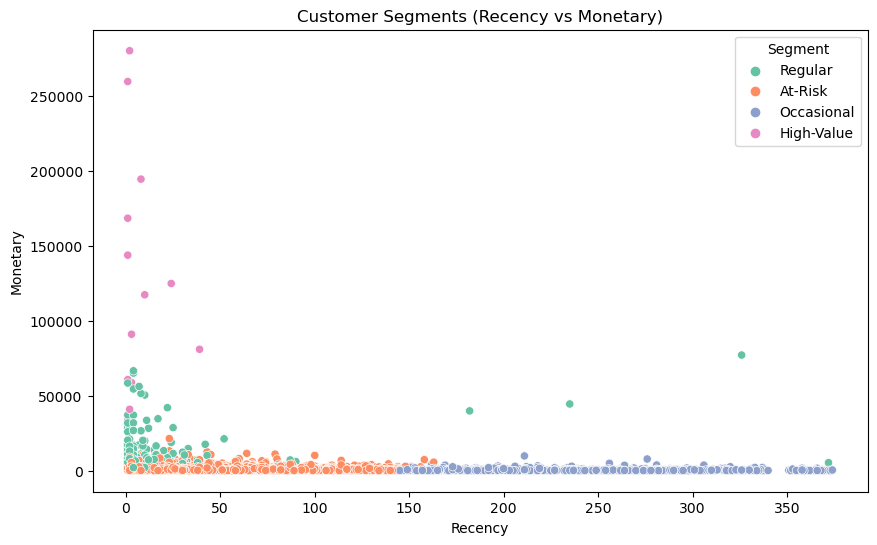

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments (Recency vs Monetary)')
plt.show()


3D Plot (Recency, Frequency, Monetary)

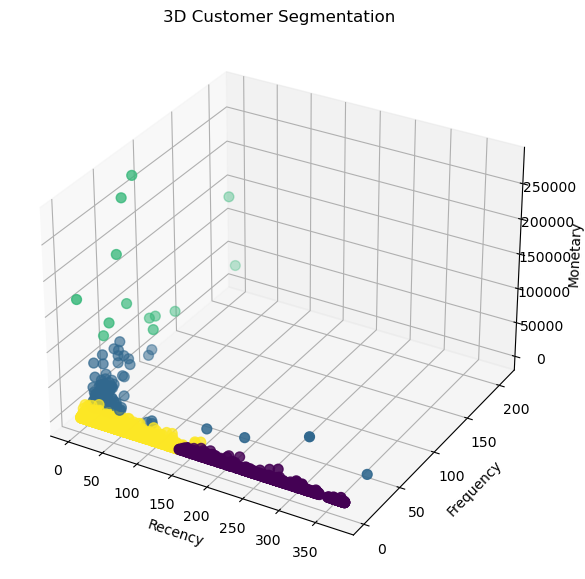

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], 
           c=rfm['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segmentation')

plt.show()


Save KMeans Model for Streamlit

In [35]:
import os

os.makedirs('models', exist_ok=True)
os.makedirs('output', exist_ok=True)


Save the KMeans model and Scaler

In [36]:
import pickle

# Save trained KMeans model
with open('models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save the scaler used for normalization
with open('models/rfm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Save the RFM DataFrame with segments

In [37]:
# Save the final RFM with Segment labels
rfm.to_csv('output/rfm_segments.csv', index=False)


In [38]:
# Load KMeans model
with open('models/kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

# Load Scaler
with open('models/rfm_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


In [40]:
# Create user-product interaction matrix
user_product_matrix = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)

# Optional: Save it for Streamlit use
user_product_matrix.to_csv('output/user_product_matrix.csv')


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import pickle

# Load the matrix
user_product_matrix = pd.read_csv('output/user_product_matrix.csv', index_col=0)

# Transpose to get item-item similarity
product_user_matrix = user_product_matrix.T  # Rows = Products, Columns = Customers

# Compute similarity matrix
item_similarity = cosine_similarity(product_user_matrix)

# Save it as a DataFrame for easier usage
item_similarity_df = pd.DataFrame(item_similarity, index=product_user_matrix.index, columns=product_user_matrix.index)

# Save for Streamlit app
with open('models/item_similarity.pkl', 'wb') as f:
    pickle.dump(item_similarity_df, f)
